In [30]:
import pandas as pd
import numpy as np


In [31]:
# 2020년 8월 부터 일요일 8개를 조회
# start : 시작일 8월
# periods : 생성한 날짜의 개수 8개
# freq : 생성할 날짜의 주기 W:주 ,M :월
pd.date_range(start='2020-08', periods=8, freq='W')
pd.date_range(start='2020-08-02', periods=8, freq=7 * "1d")

df = pd.DataFrame({
    "week" : pd.date_range(start="2021-08-06", periods=8, freq= 7 * "1d"),
    "sales" : [39, 44, 40, 45, 38, 43, 39, np.nan],
    "EXPONETIAL": [0]*8
})
df

,week,sales,EXPONETIAL
0,2021-08-06,39.0,0
1,2021-08-13,44.0,0
2,2021-08-20,40.0,0
3,2021-08-27,45.0,0
4,2021-09-03,38.0,0
5,2021-09-10,43.0,0
6,2021-09-17,39.0,0
7,2021-09-24,NaN,0


# 지수이동평균

In [32]:
span = 3
alpha = 2.0 / (1.0 + span)
alpha

0.5

In [33]:
# 지수
df[["sales"]].ewm(span=3).mean()

# 컬럼 추가
df["EXPONETIAL"] = df[["sales"]].ewm(span=3).mean().shift(1)

df

,week,sales,EXPONETIAL
0,2021-08-06,39.0,NaN
1,2021-08-13,44.0,39.000000
2,2021-08-20,40.0,42.333333
3,2021-08-27,45.0,41.000000
4,2021-09-03,38.0,43.133333
5,2021-09-10,43.0,40.483871
6,2021-09-17,39.0,41.761905
7,2021-09-24,NaN,40.370079


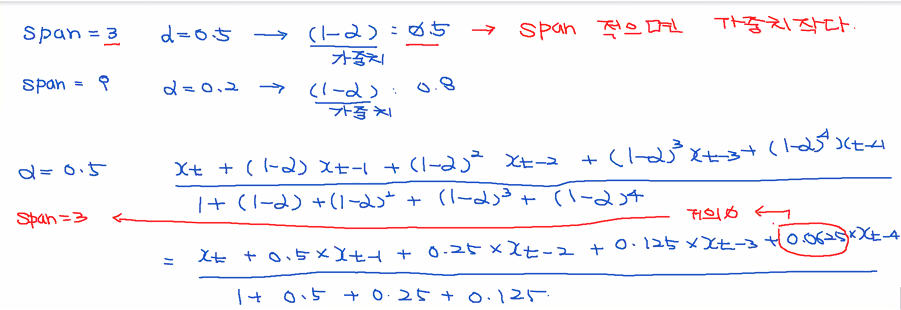

In [34]:
df["EXPONETIAL"] = df[["sales"]].ewm(span=3).mean()
df

,week,sales,EXPONETIAL
0,2021-08-06,39.0,39.000000
1,2021-08-13,44.0,42.333333
2,2021-08-20,40.0,41.000000
3,2021-08-27,45.0,43.133333
4,2021-09-03,38.0,40.483871
5,2021-09-10,43.0,41.761905
6,2021-09-17,39.0,40.370079
7,2021-09-24,NaN,40.370079


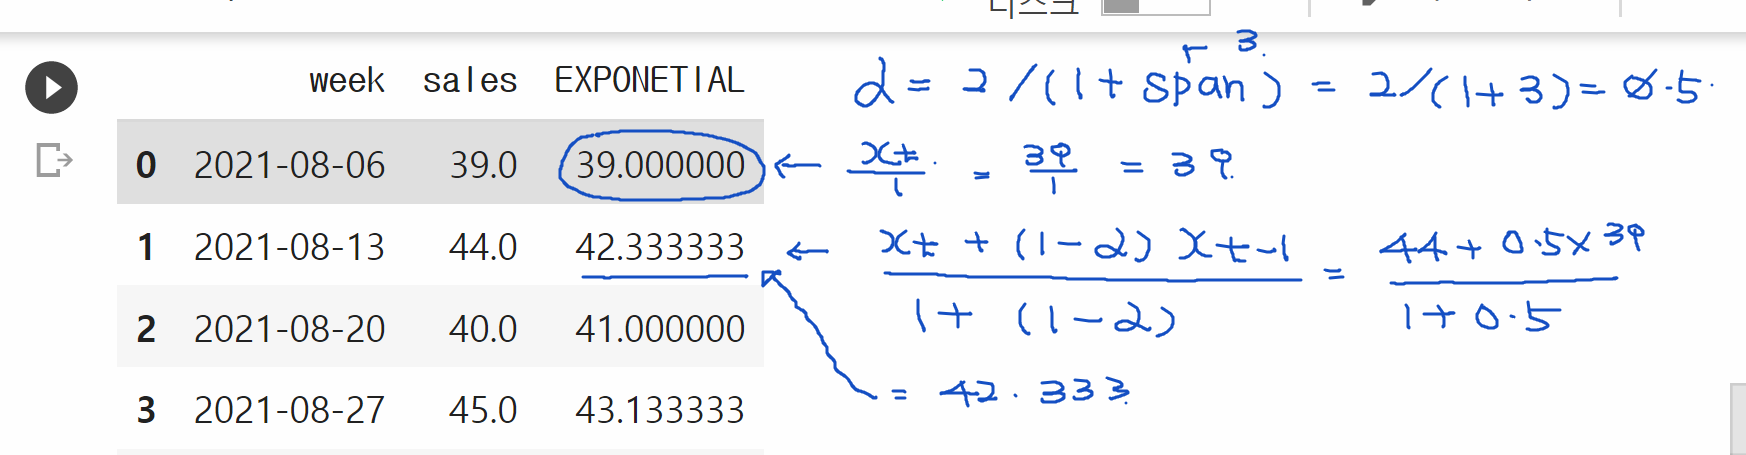

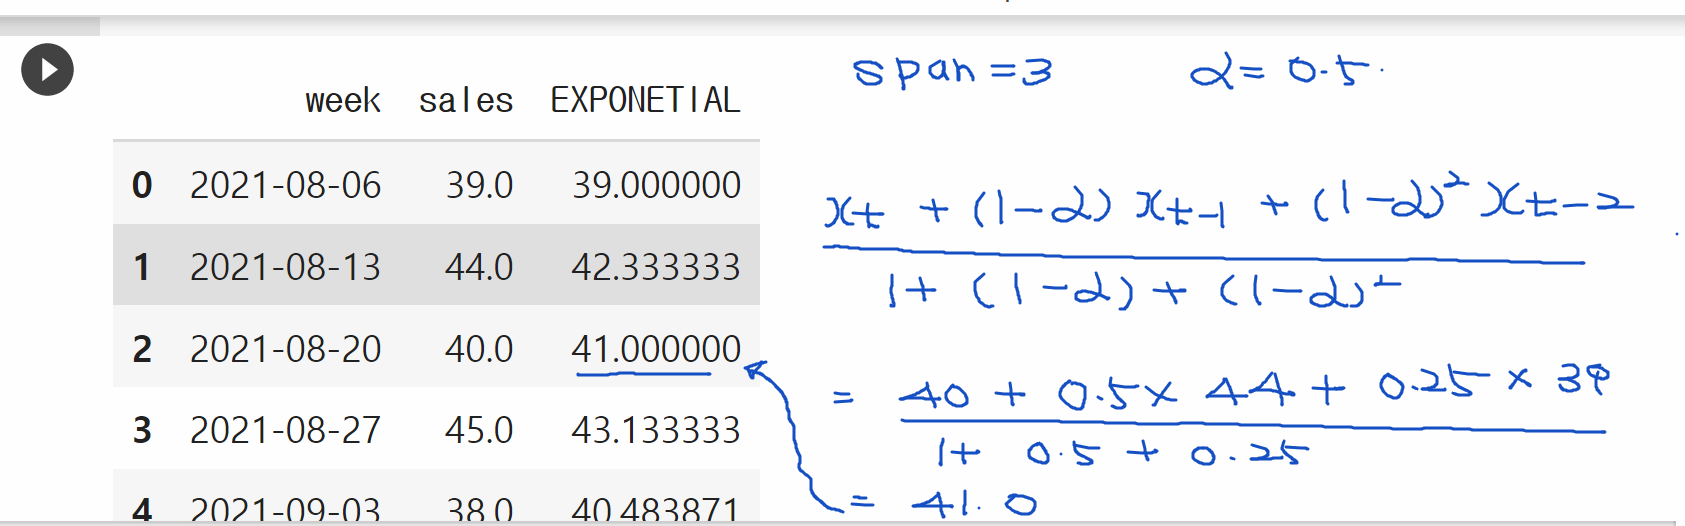

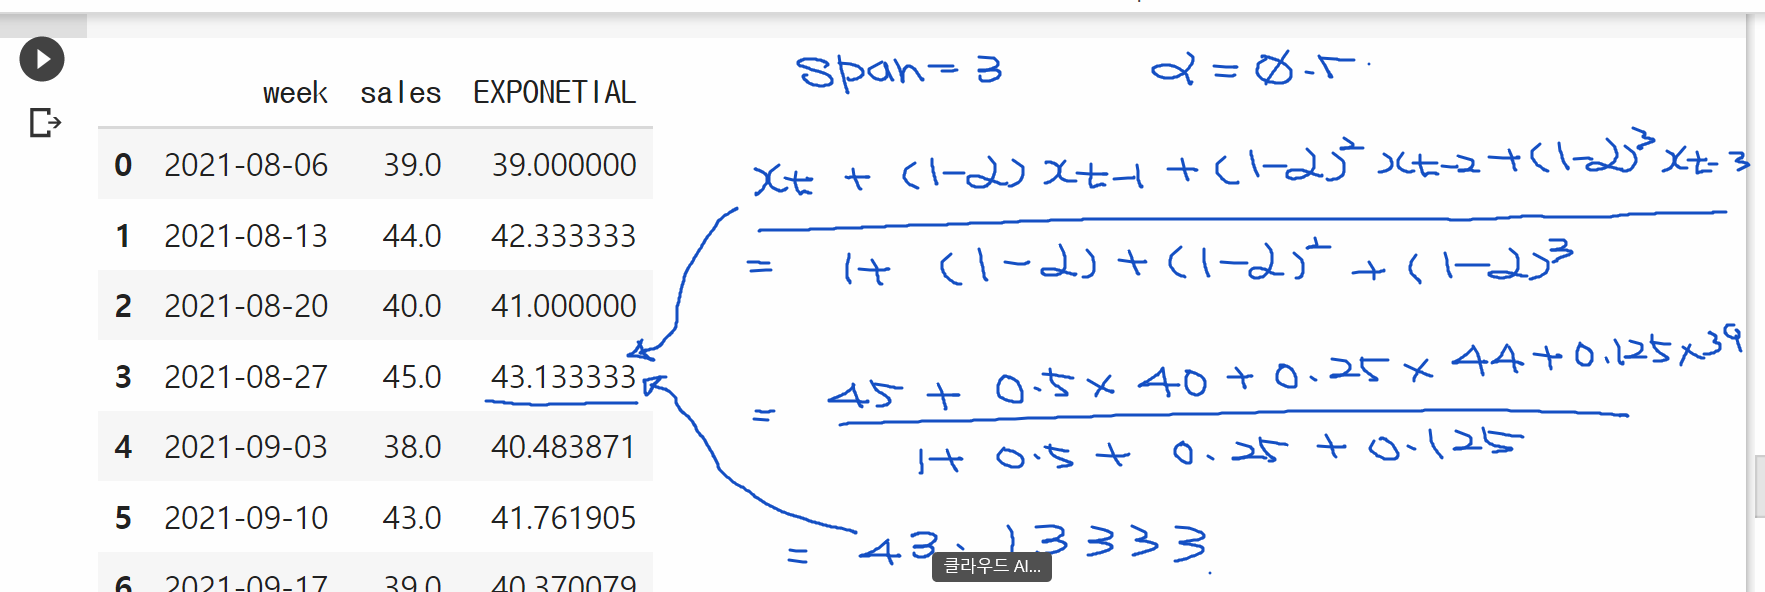

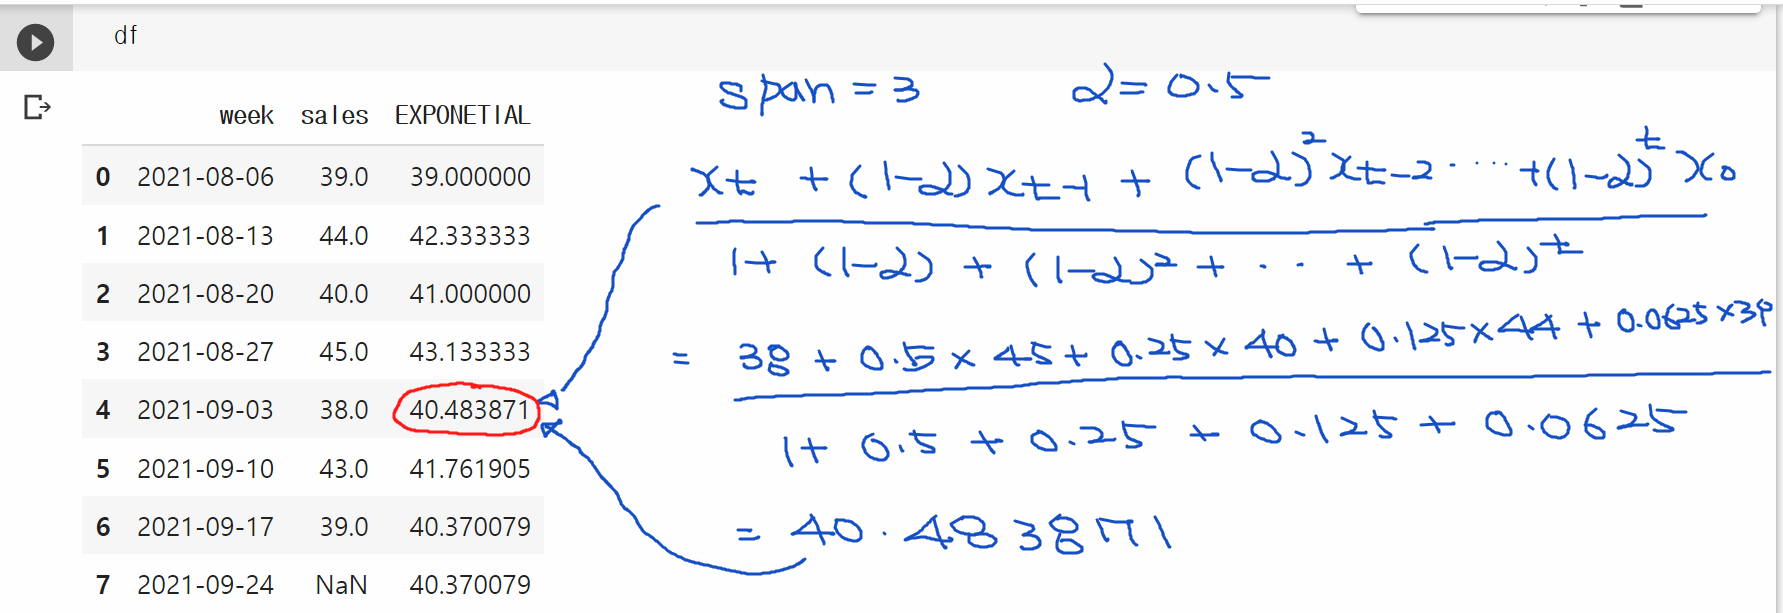

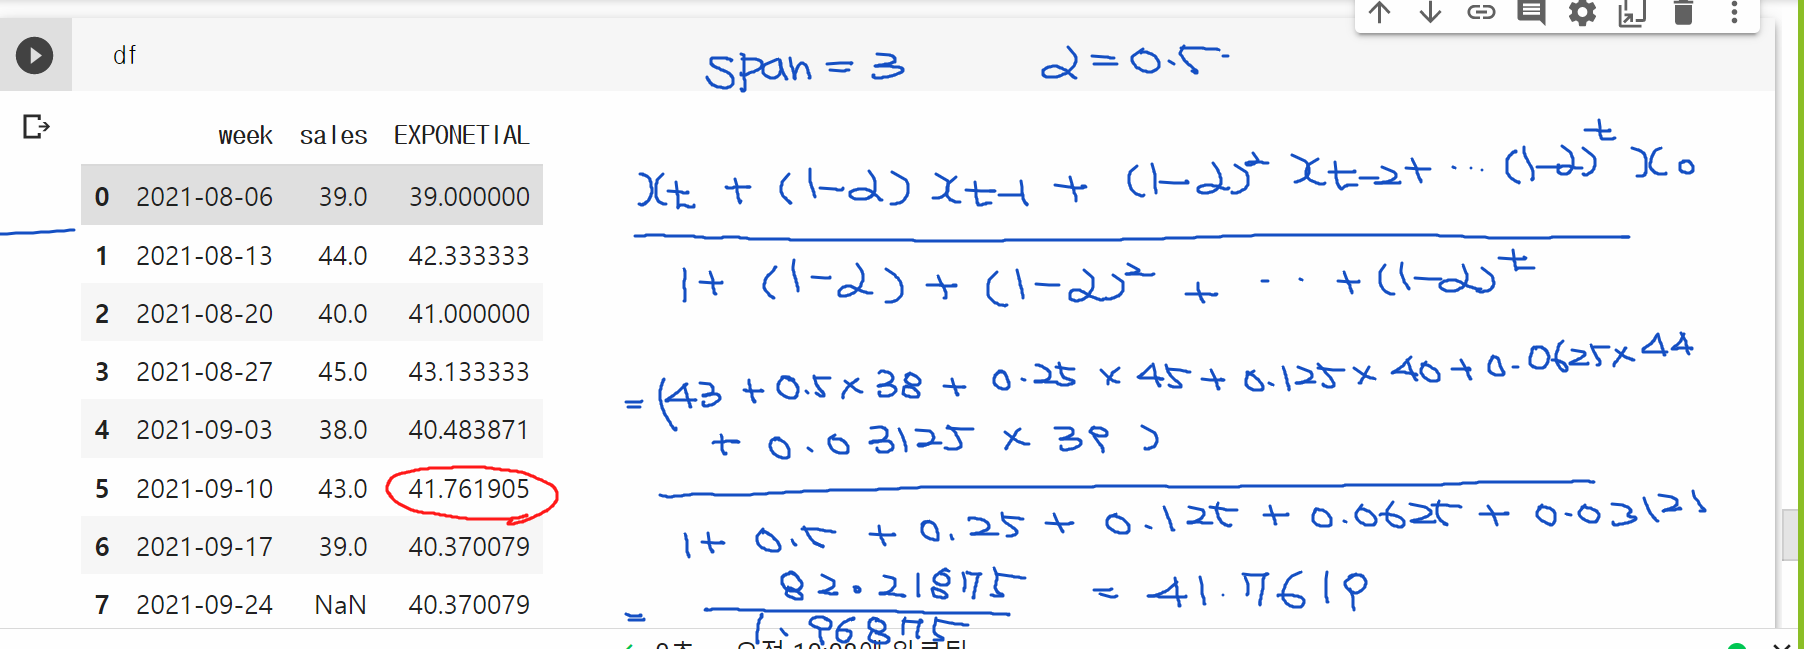

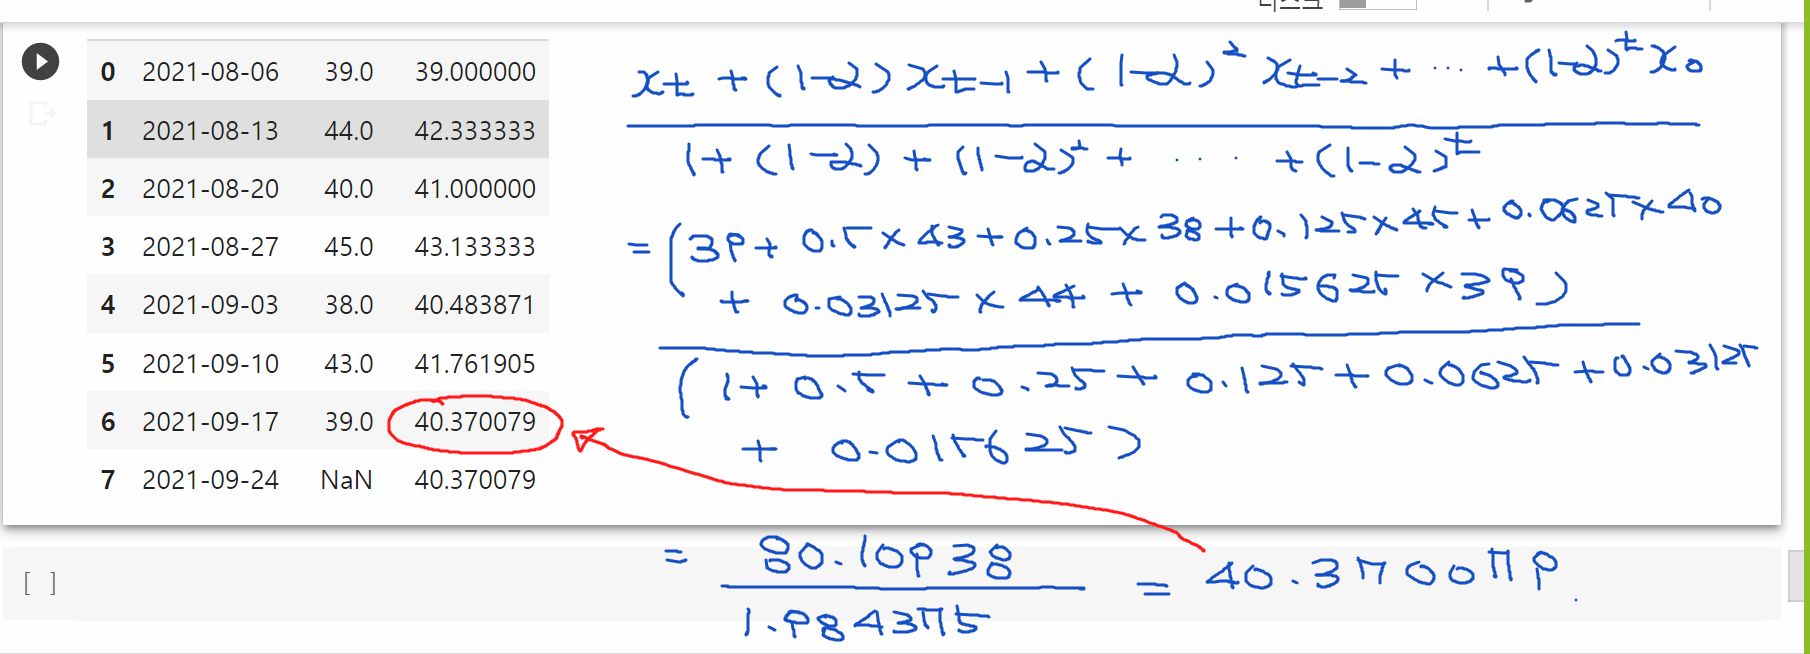

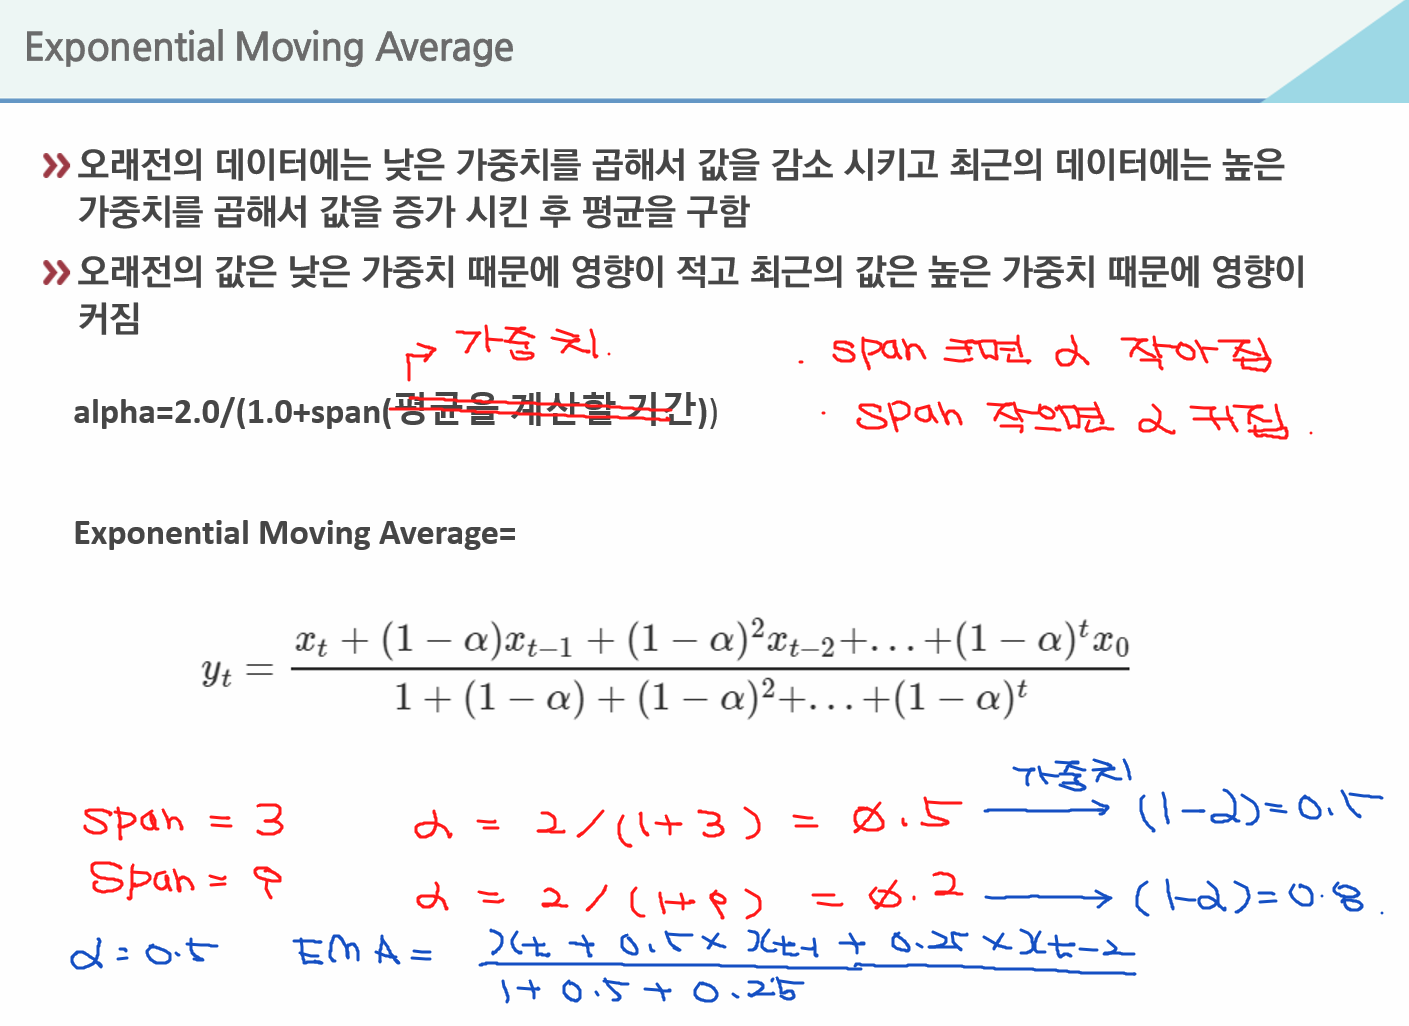

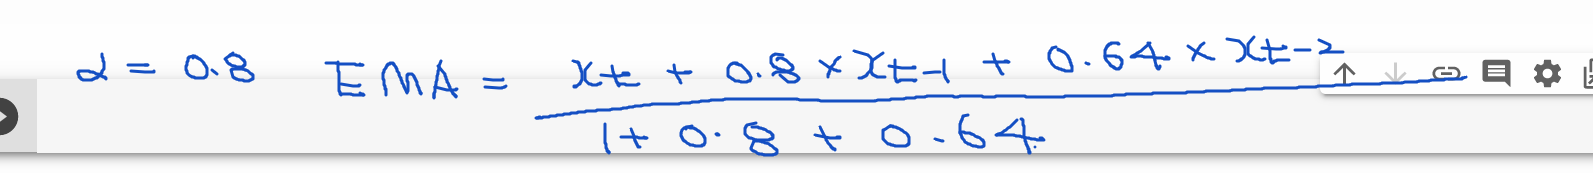

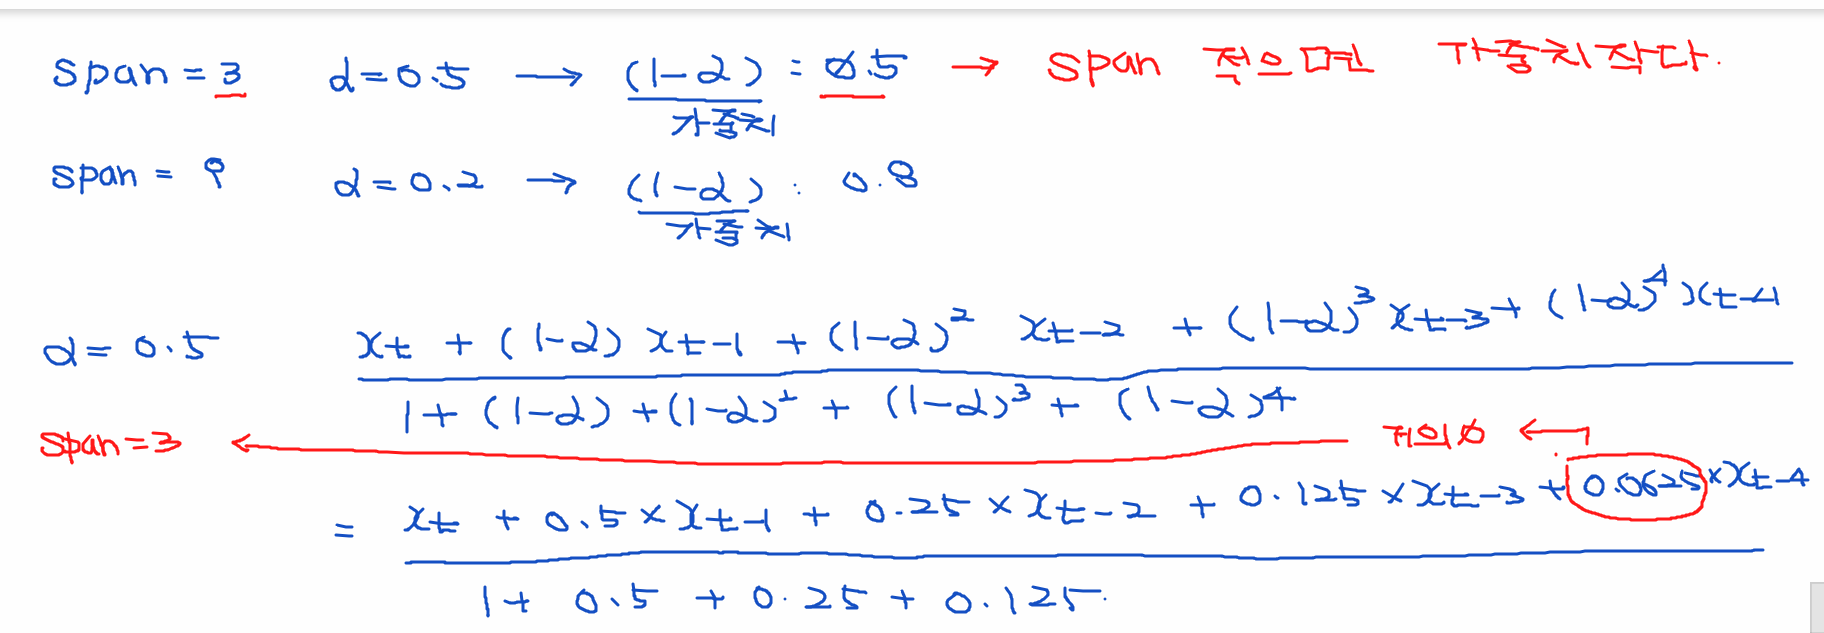

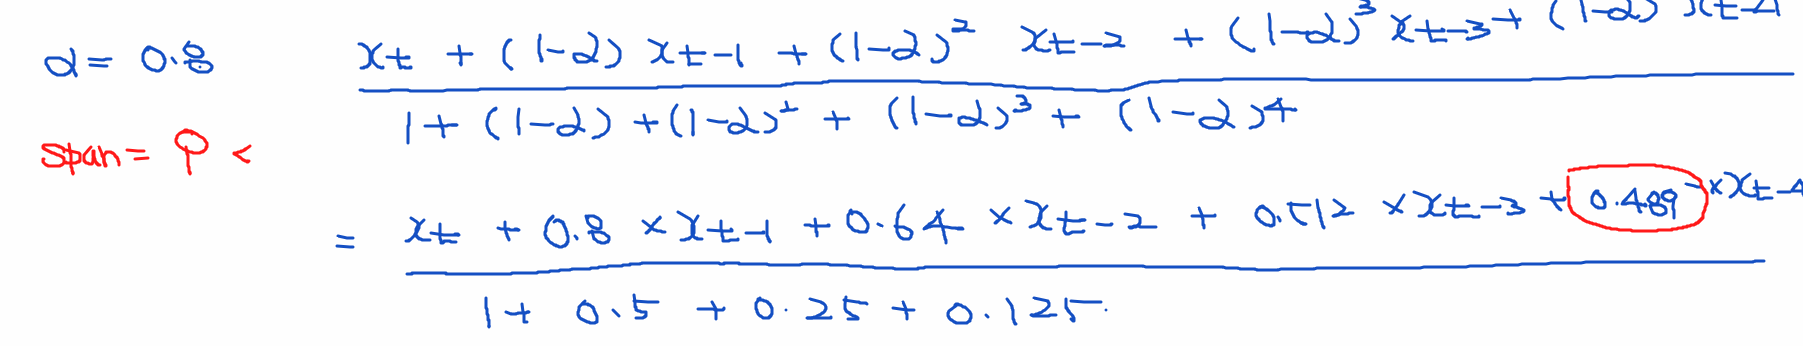

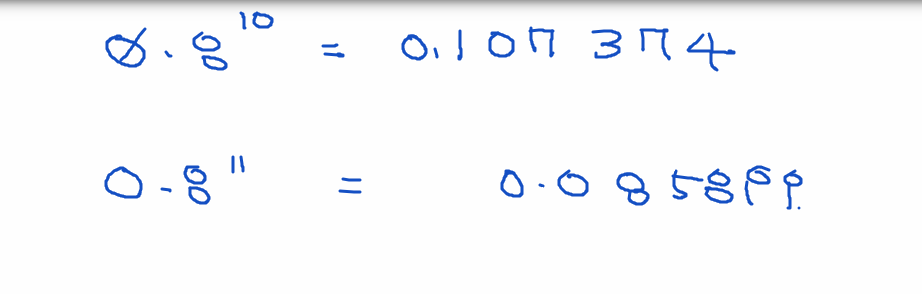

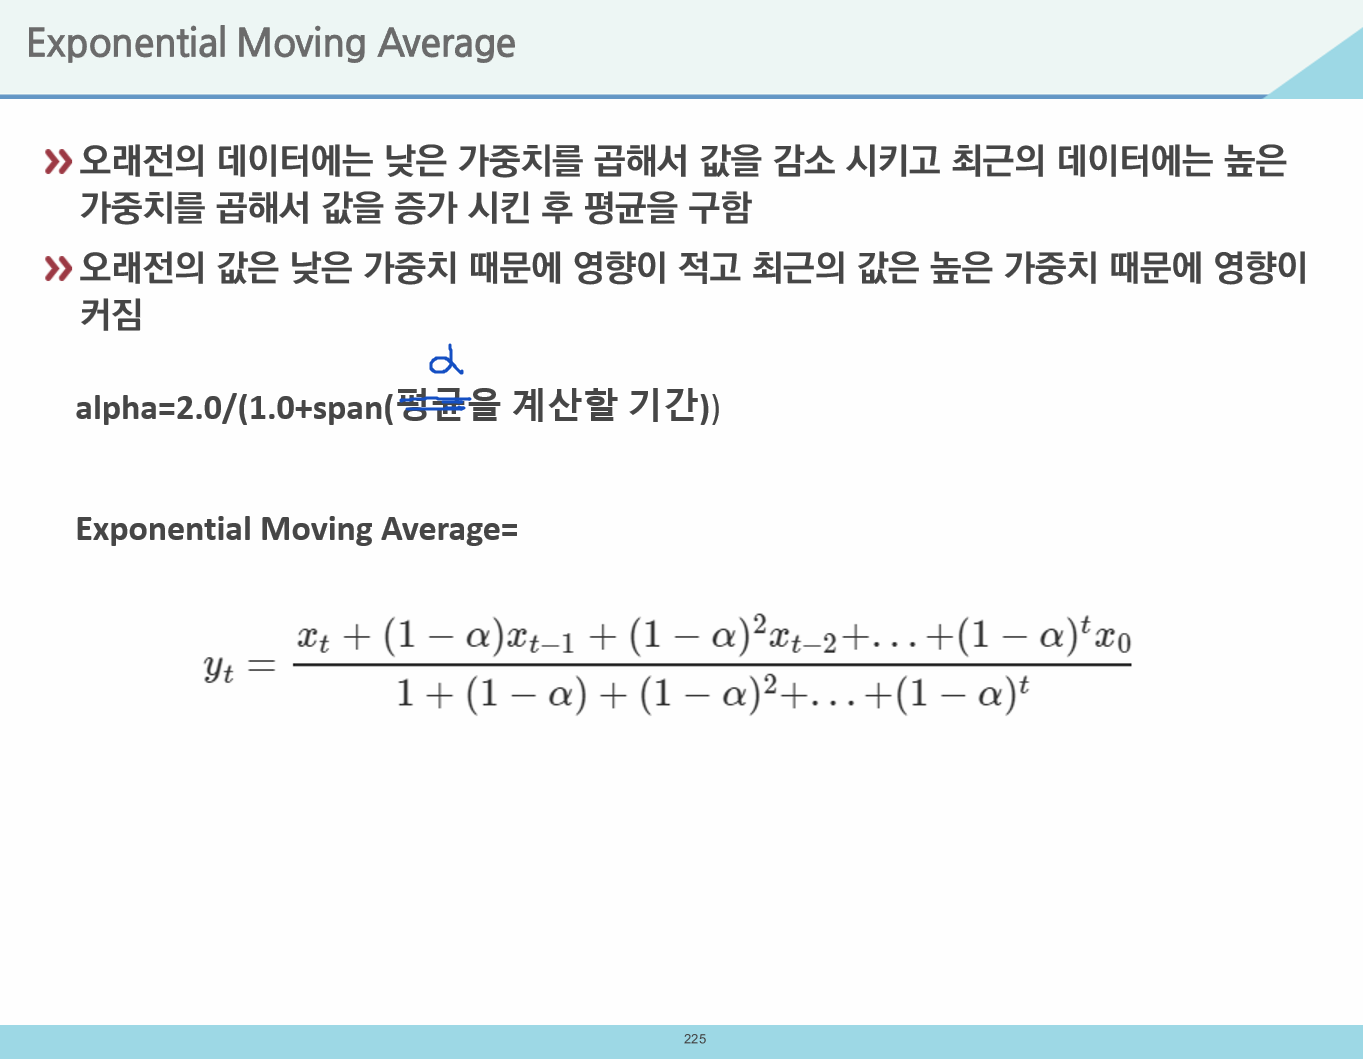

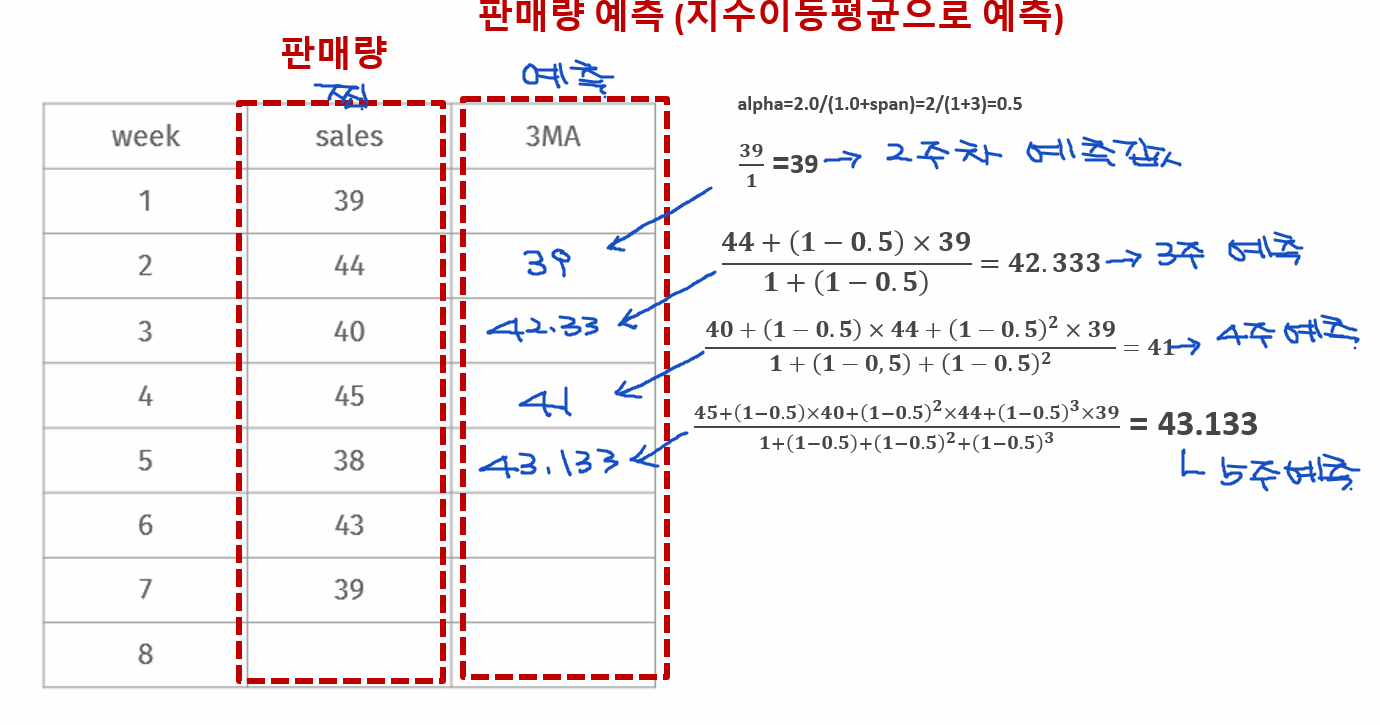

In [35]:
df["EXPONETIAL"] = df["EXPONETIAL"].shift(1)
df

,week,sales,EXPONETIAL
0,2021-08-06,39.0,NaN
1,2021-08-13,44.0,39.000000
2,2021-08-20,40.0,42.333333
3,2021-08-27,45.0,41.000000
4,2021-09-03,38.0,43.133333
5,2021-09-10,43.0,40.483871
6,2021-09-17,39.0,41.761905
7,2021-09-24,NaN,40.370079


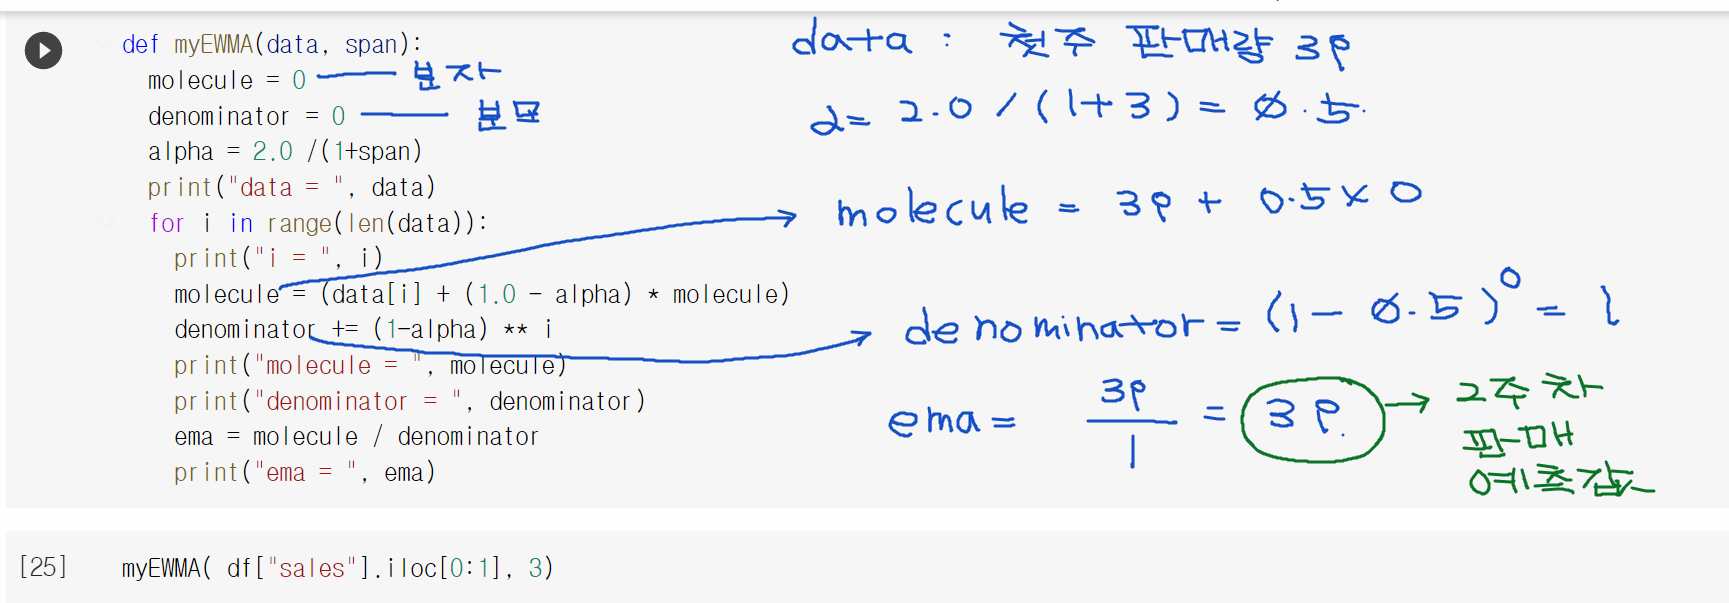

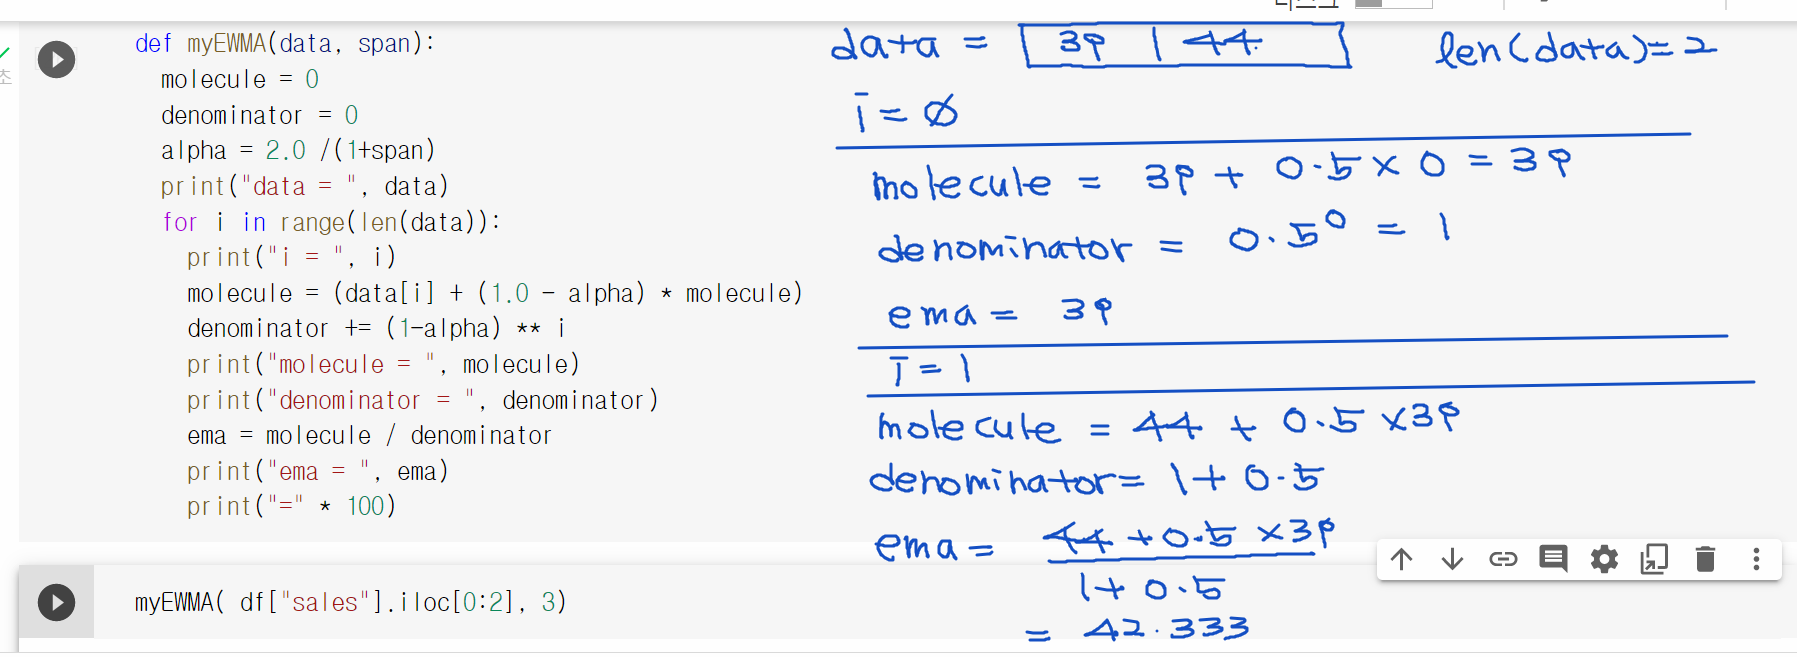

In [38]:
def myEWMA(data, span):
  molecule = 0 # 분자
  denominator = 0  # 분모

  alpha = 2.0 /(1+span)
  print("data = ", data)

  for i in range(len(data)):
    print("i = ", i)
    molecule = (data[i] + (1.0 - alpha) * molecule)
    denominator += (1-alpha) ** i
    print("molecule = ", molecule)
    print("denominator = ", denominator)
    ema = molecule / denominator
    print("ema = ", ema)
    print("=" * 100)
    ewma [i] = ema

return = ema

In [39]:
myEWMA( df["sales"].iloc[0:2], 3)

data =  0    39.0
1    44.0
Name: sales, dtype: float64
i =  0
molecule =  39.0
denominator =  1.0
ema =  39.0
i =  1
molecule =  63.5
denominator =  1.5
ema =  42.333333333333336


In [40]:
myEWMA( df["sales"].iloc[0:4], 3)

data =  0    39.0
1    44.0
2    40.0
3    45.0
Name: sales, dtype: float64
i =  0
molecule =  39.0
denominator =  1.0
ema =  39.0
i =  1
molecule =  63.5
denominator =  1.5
ema =  42.333333333333336
i =  2
molecule =  71.75
denominator =  1.75
ema =  41.0
i =  3
molecule =  80.875
denominator =  1.875
ema =  43.13333333333333


In [41]:
myEWMA( df["sales"], 3)

data =  0    39.0
1    44.0
2    40.0
3    45.0
4    38.0
5    43.0
6    39.0
7     NaN
Name: sales, dtype: float64
i =  0
molecule =  39.0
denominator =  1.0
ema =  39.0
i =  1
molecule =  63.5
denominator =  1.5
ema =  42.333333333333336
i =  2
molecule =  71.75
denominator =  1.75
ema =  41.0
i =  3
molecule =  80.875
denominator =  1.875
ema =  43.13333333333333
i =  4
molecule =  78.4375
denominator =  1.9375
ema =  40.483870967741936
i =  5
molecule =  82.21875
denominator =  1.96875
ema =  41.76190476190476
i =  6
molecule =  80.109375
denominator =  1.984375
ema =  40.37007874015748
i =  7
molecule =  nan
denominator =  1.9921875
ema =  nan
